Statistics and Probability Final Project


---

# **Factors Influencing Traffic Crash Severity**

---

Sawera & Aizirek & Alfiia

## **Introduction**

**Problem Formulation:**

Traffic accidents are a critical public safety issue, accounting for over 1.3 million fatalities annually worldwide. Non-fatal injuries and economic losses further exacerbate this issue, particularly in urban areas. Identifying factors that influence crash severity provides an opportunity for targeted interventions, including infrastructural improvements and awareness campaigns.
This project explores probabilistic models to examine the relationship between crash severity and multiple factors, including environmental conditions, driver behavior, and lighting. Probabilistic aspects, such as conditional probabilities and distributions of severity outcomes, are key to quantifying the influence of these factors. By leveraging these models, we aim to provide actionable insights for policymakers.


**Research Question:**

Primary Research Question:

*   What are the key factors that influence crash severity, and how can probabilistic models predict injury outcomes?

Sub-questions:

*   How do adverse weather conditions impact the probability of severe crashes?

*   What is the likelihood of severe injuries due to driver distraction, and how does it vary by type of distraction?
*   How do lighting conditions affect the probabilities of crash severity levels (e.g., no injury, minor injury, severe injury)?


*   What is the joint probability distribution of severe injuries under different weather and lighting conditions, and how does it differ from the marginal probabilities of each factor alone?
*   How do the conditional probabilities of different injury severity levels vary across vehicle types and road conditions?

*   What is the temporal probability distribution of severe crashes, and how does it correlate with traffic patterns and environmental conditions?





**Objectives:**

*   Identify and quantify key factors influencing crash severity
*   Analyze the probabilistic relationships between environmental conditions and accident outcomes

*   Evaluate the impact of human factors, particularly driver behavior
*   Assess the role of infrastructure and vehicle-related factors in crash severity


**Significance:**

Understanding these factors is pivotal for several reasons:
*   Policy Development: Insights can inform policies aimed at mitigating high-risk conditions, such as enforcing stricter regulations against distracted driving or improving road lighting.
*   Urban Planning: Data-driven decisions can enhance infrastructural elements to improve road safety.


*   Public Awareness: Identifying key risk factors allows for targeted awareness campaigns to educate drivers about specific hazards.

##**Methodology**

**Data Source:**

The dataset used in this study is derived from the Kaggle website. It includes detailed information on traffic accidents, encompassing variables like weather conditions, lighting, driver distractions, vehicle types, and injury severities.



**Analytical Approach:**

The study employs statistical and probabilistic methods to analyze patterns and relationships within the data, including:

*  Frequency distribution analysis
*   Cross-tabulation of key variables

*   Conditional probability assessment
*   Temporal pattern analysis





## **Analysis and Demonstration**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()  # Opens a file upload dialog in Colab
crash_data = pd.read_excel('/content/Crash_Reporting_Cleaned.xlsx')

Saving Crash_Reporting_Cleaned.xlsx to Crash_Reporting_Cleaned (1).xlsx


**Data Cleaning and Preprocessing:**

In [ ]:
# Check for missing values
print("\nMissing Values:\n", crash_data.isnull().sum())

# Fill missing values and drop rows with critical missing data
crash_data['Driver Substance Abuse'] = crash_data['Driver Substance Abuse'].fillna('UNKNOWN')
crash_data.dropna(subset=['Traffic Control', 'Injury Severity'], inplace=True)

# Convert categorical variables to consistent formats
categorical_columns = ['Injury Severity', 'Weather', 'Light', 'Driver Distracted By']
for col in categorical_columns:
    crash_data[col] = crash_data[col].str.upper()


Missing Values:
 ACRS Report Type              0
Crash Date/Time               0
Collision Type              413
Weather                   10680
Surface Condition         13388
Light                      1143
Traffic Control               0
Driver Substance Abuse        0
Driver At Fault               0
Injury Severity               0
Driver Distracted By        133
Vehicle Damage Extent       232
Vehicle Body Type          2112
Vehicle Movement            580
Speed Limit                   0
Vehicle Year                  0
Vehicle Make                136
dtype: int64


**Statistical summary and box-and-whisker plot for numeric columns:**

Statistical Summary:
                     Mean  Median  Mode      Variance  Standard Deviation
Speed Limit     33.231586    35.0    35    101.888901           10.094003
Vehicle Year  1971.014955  2012.0  2015  99076.187217          314.763701


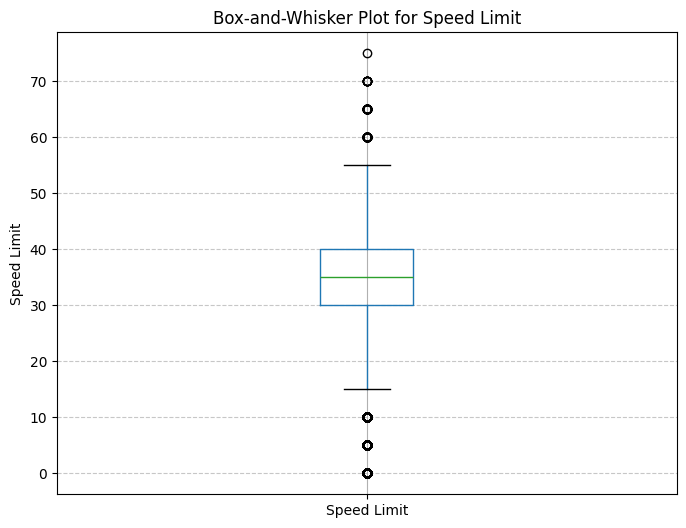

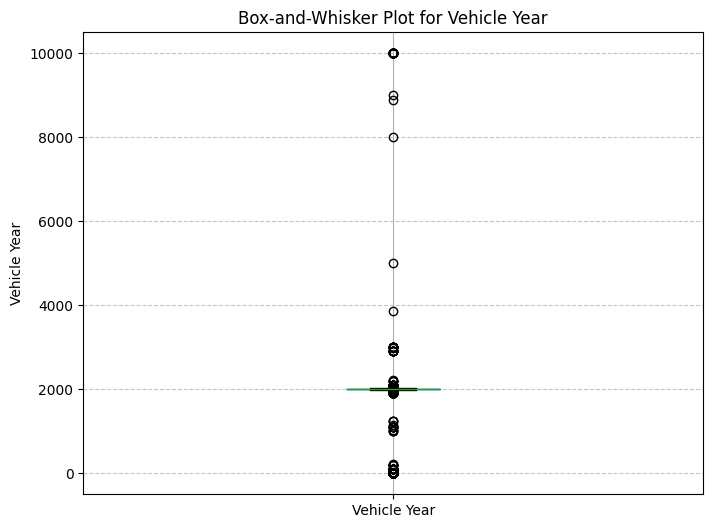

In [ ]:
# Select numeric columns for analysis
numeric_columns = crash_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate statistics
stats_summary = pd.DataFrame({
    'Mean': crash_data[numeric_columns].mean(),
    'Median': crash_data[numeric_columns].median(),
    'Mode': crash_data[numeric_columns].mode().iloc[0],
    'Variance': crash_data[numeric_columns].var(),
    'Standard Deviation': crash_data[numeric_columns].std()
})

# Display the calculated statistics
print("Statistical Summary:")
print(stats_summary)

# Create box-and-whisker plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    crash_data.boxplot(column=column)
    plt.title(f'Box-and-Whisker Plot for {column}')
    plt.ylabel(column)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

**Exploratory Data Analysis and Probabilistic Insights:**

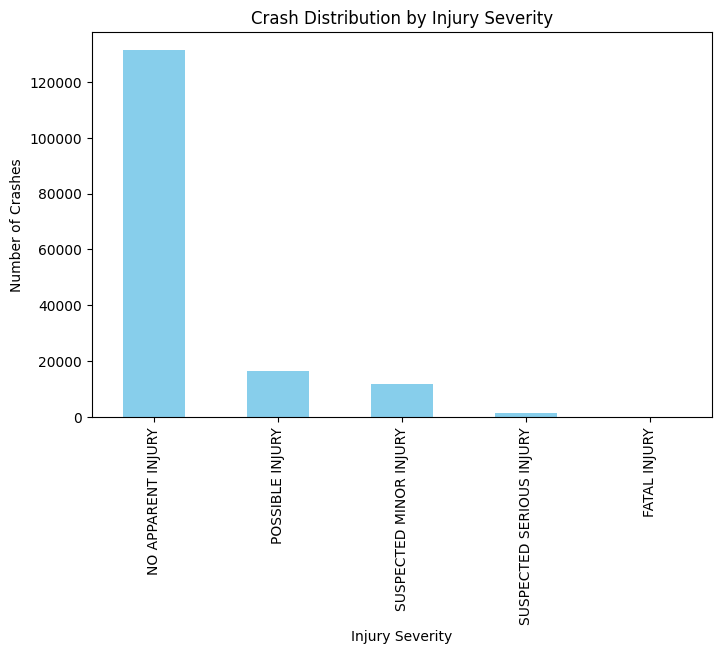

In [ ]:
# a. Crash distribution by severity
severity_count = crash_data['Injury Severity'].value_counts()
plt.figure(figsize=(8, 5))
severity_count.plot(kind='bar', color='skyblue')
plt.title('Crash Distribution by Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Crashes')
plt.show()


*Insight: Most crashes result in "No Apparent Injury".*

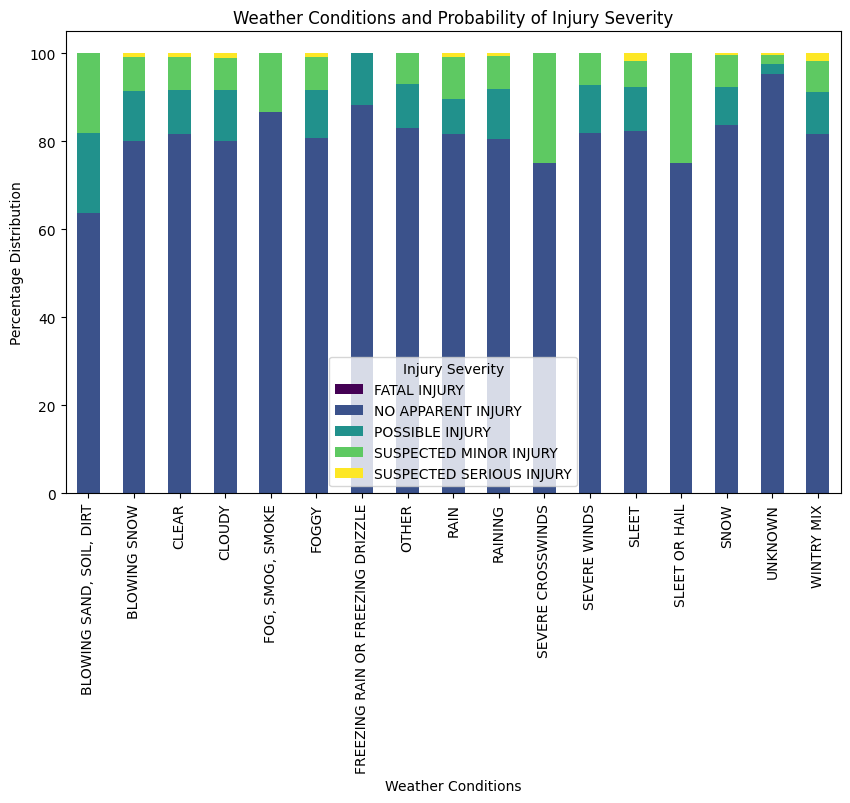

In [ ]:
# b. Probabilistic relationship between weather and severity
weather_severity = pd.crosstab(crash_data['Weather'], crash_data['Injury Severity'], normalize='index') * 100
weather_severity.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Weather Conditions and Probability of Injury Severity')
plt.xlabel('Weather Conditions')
plt.ylabel('Percentage Distribution')
plt.legend(title='Injury Severity')
plt.show()


*Insight: Severe crashes are more likely under adverse weather conditions.*

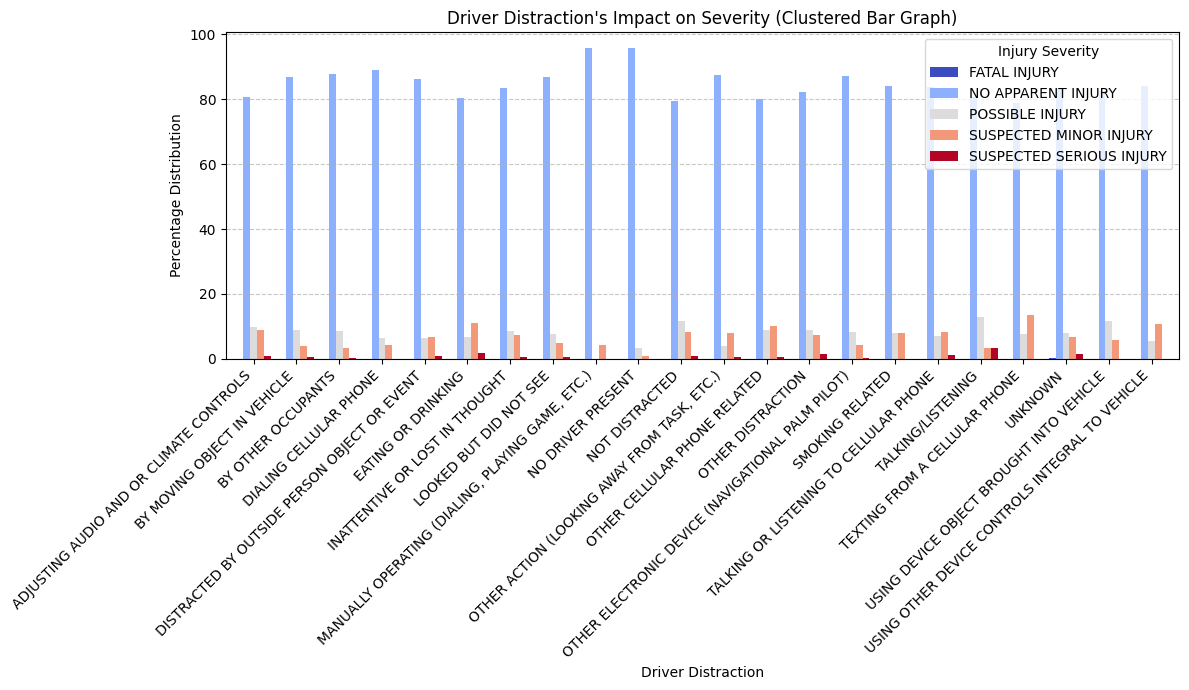

In [ ]:
# c. Driver distraction's impact on severity
distraction_severity = pd.crosstab(crash_data['Driver Distracted By'], crash_data['Injury Severity'], normalize='index') * 100

# Plotting clustered bar graph
distraction_severity.plot(kind='bar', figsize=(12, 7), colormap='coolwarm', width=0.8)
plt.title("Driver Distraction's Impact on Severity (Clustered Bar Graph)")
plt.xlabel('Driver Distraction')
plt.ylabel('Percentage Distribution')
plt.legend(title='Injury Severity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Insight: Distracted driving increases the probability of severe injuries.*

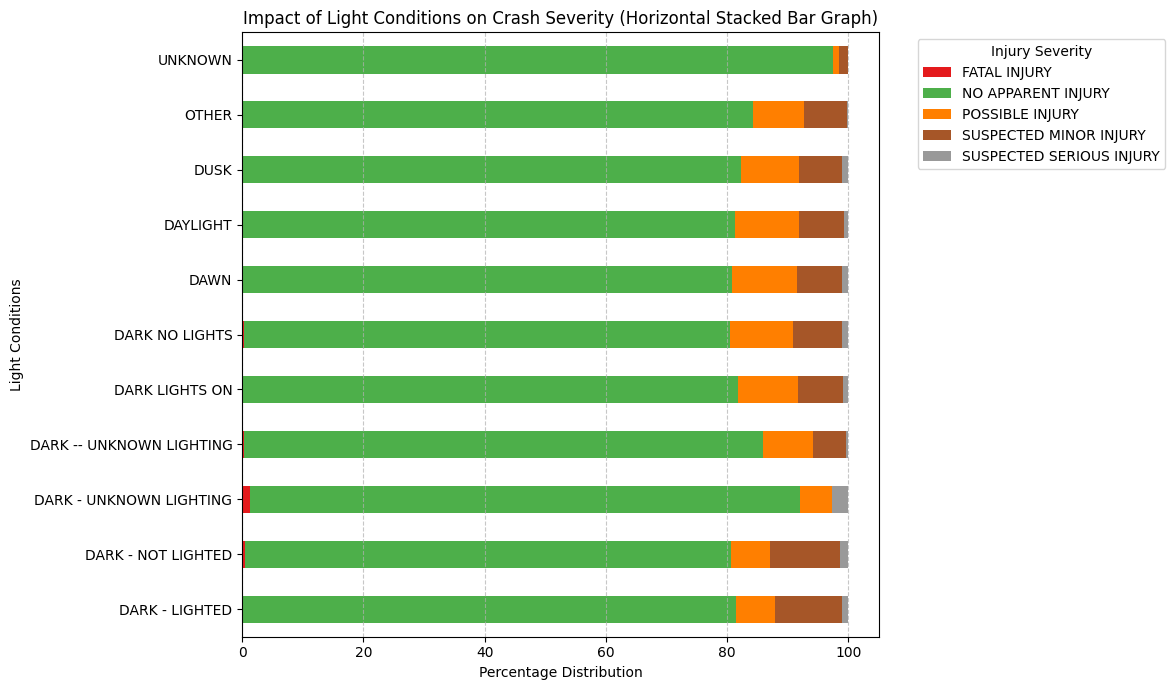

In [ ]:
# d. Impact of light conditions on crash severity
light_severity = pd.crosstab(crash_data['Light'], crash_data['Injury Severity'], normalize='index') * 100

# Plotting horizontal stacked bar graph
light_severity.plot(kind='barh', stacked=True, figsize=(12, 7), colormap='Set1')
plt.title("Impact of Light Conditions on Crash Severity (Horizontal Stacked Bar Graph)")
plt.xlabel('Percentage Distribution')
plt.ylabel('Light Conditions')
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Insight: Poor lighting correlates with higher probabilities of severe crashes.*

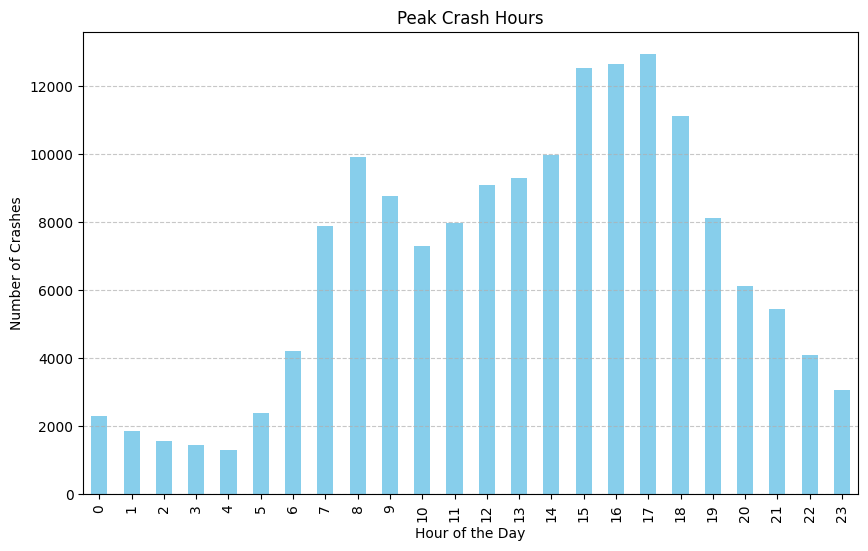

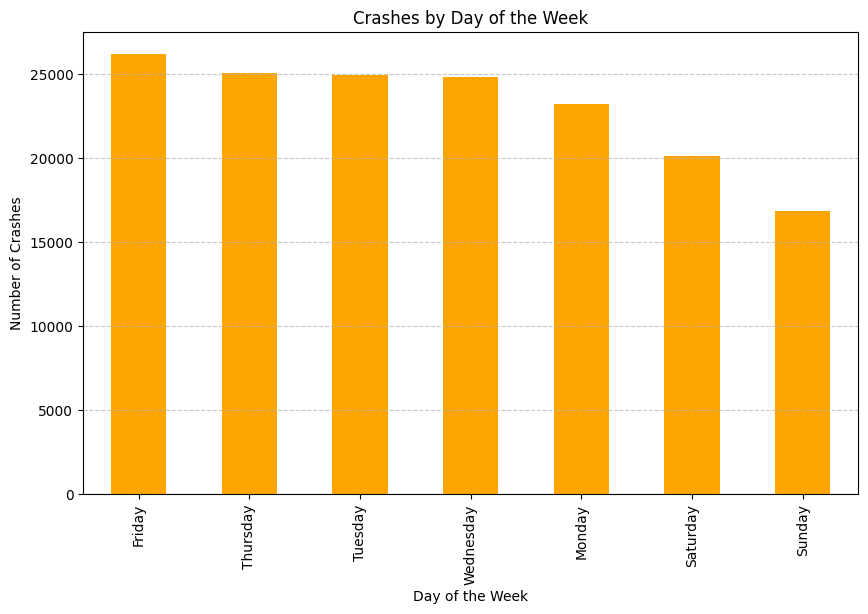

In [ ]:
# e. Peak crash hours & crushes by day of the week
# Convert 'Crash Date/Time' to datetime
if 'Crash Date/Time' in crash_data.columns:
    crash_data['Crash Date/Time'] = pd.to_datetime(crash_data['Crash Date/Time'])
    crash_data['Hour'] = crash_data['Crash Date/Time'].dt.hour
    crash_data['DayOfWeek'] = crash_data['Crash Date/Time'].dt.day_name()
    crash_data['Month'] = crash_data['Crash Date/Time'].dt.month_name()
else:
    print("'Crash Date/Time' column not found in the dataset.")

# Analyze peak crash hours
hourly_crash_counts = crash_data['Hour'].value_counts().sort_index()


# Visualize peak crash hours
plt.figure(figsize=(10, 6))
hourly_crash_counts.plot(kind='bar', color='skyblue')
plt.title('Peak Crash Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze crashes by day of the week
daywise_crash_counts = crash_data['DayOfWeek'].value_counts()

# Visualize crashes by day of the week
plt.figure(figsize=(10, 6))
daywise_crash_counts.plot(kind='bar', color='orange')
plt.title('Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


*Insight:*

*  Crashes peak between 3-6 p.m., aligning with afternoon rush hours and heavy traffic.
*   Friday sees the highest crashes, likely due to increased end-of-week road activity.

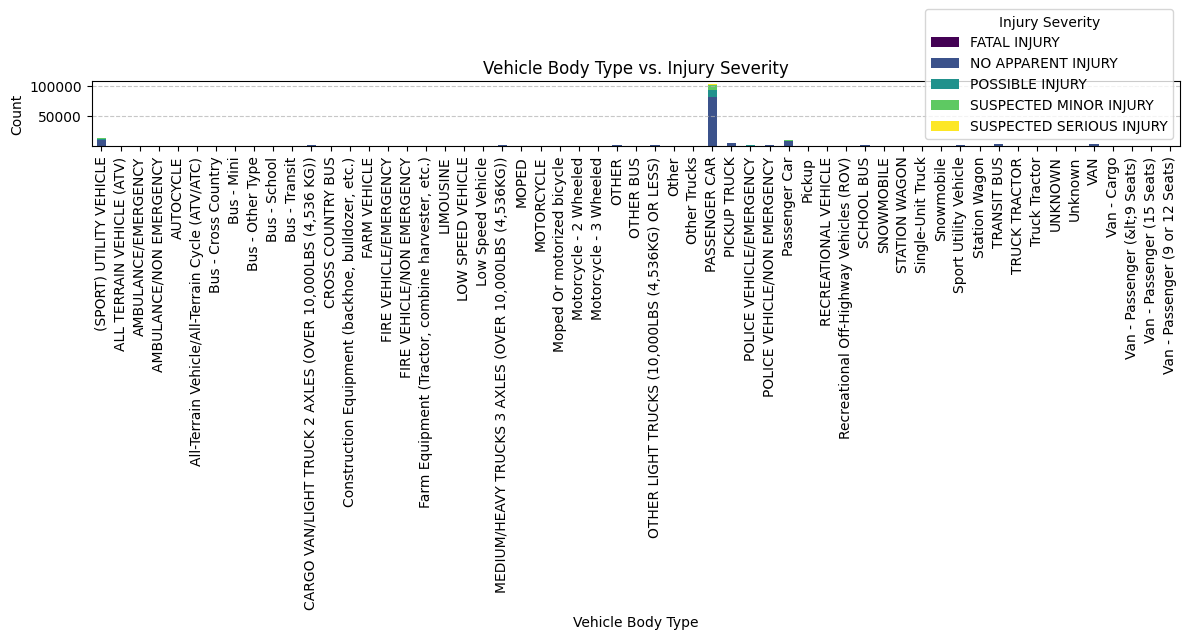

In [ ]:
# f. Analyze vehicle body type vs. injury severity
if 'Vehicle Body Type' in crash_data.columns and 'Injury Severity' in crash_data.columns:
    vehicle_severity = pd.crosstab(crash_data['Vehicle Body Type'], crash_data['Injury Severity'])


    # Visualize vehicle body type vs. severity
    vehicle_severity.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
    plt.title('Vehicle Body Type vs. Injury Severity')
    plt.xlabel('Vehicle Body Type')
    plt.ylabel('Count')
    plt.legend(title='Injury Severity')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



*Insight: Passenger cars account for the vast majority of vehicle accidents across all injury severity levels, dwarfing all other vehicle types by a significant margin.*

<Figure size 1500x800 with 0 Axes>

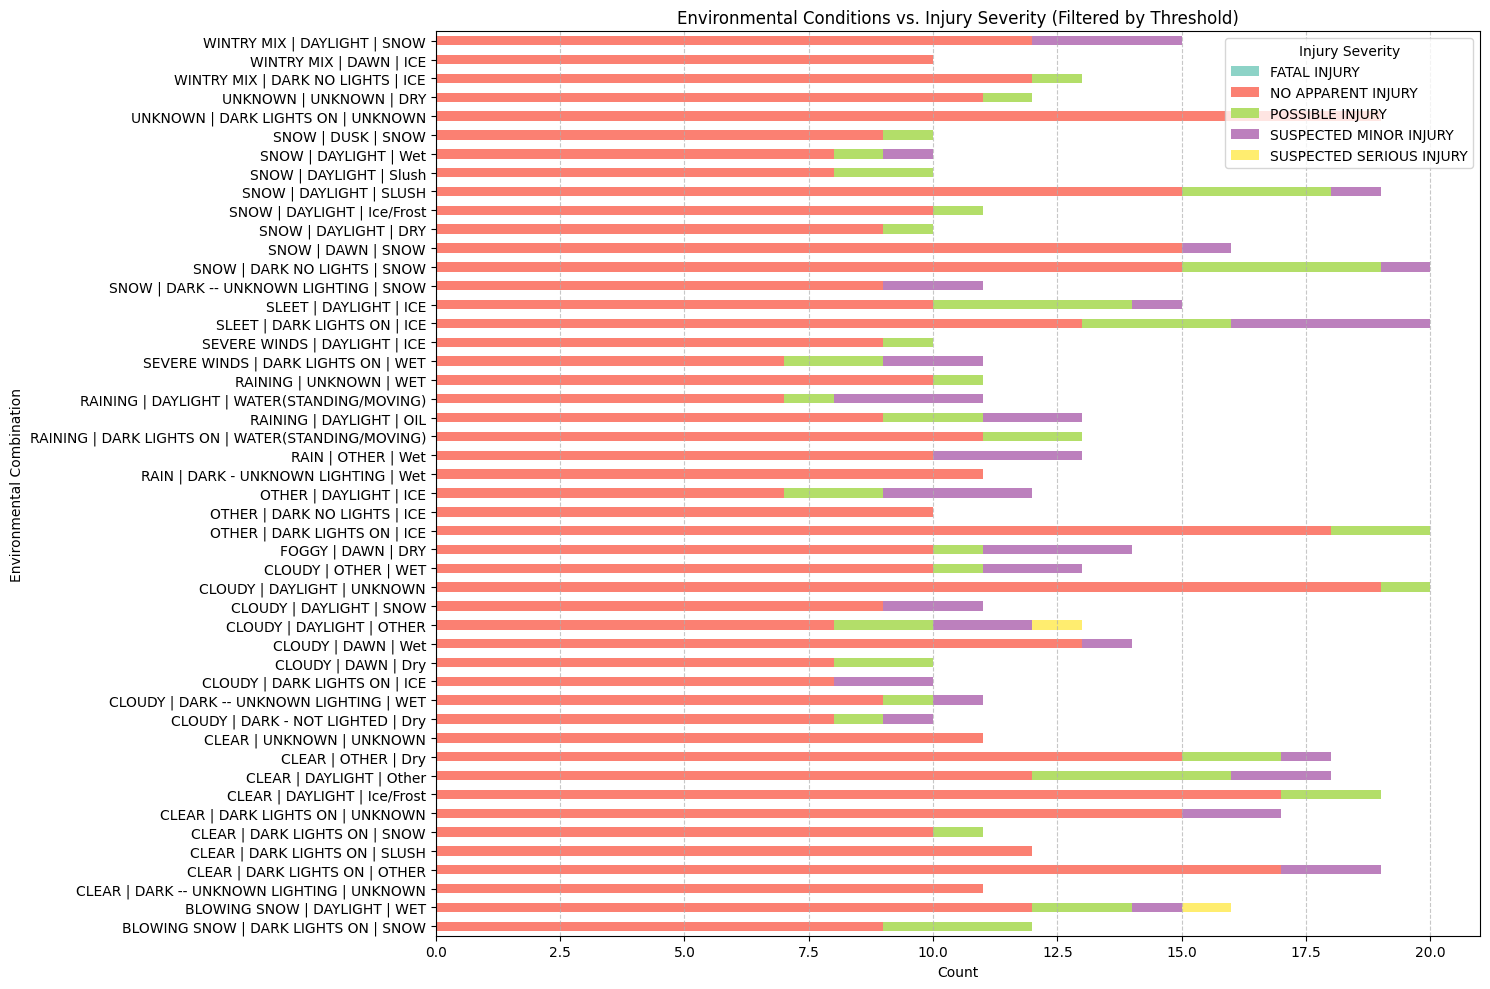

In [ ]:
# g. Analyze combined environmental factors vs. severity
# Create a new combined feature for environmental factors
if 'Weather' in crash_data.columns and 'Light' in crash_data.columns and 'Surface Condition' in crash_data.columns:
    crash_data['Environmental Combo'] = crash_data['Weather'] + ' | ' + crash_data['Light'] + ' | ' + crash_data['Surface Condition']

# Analyze combined environmental factors vs. severity
env_combo_severity = pd.crosstab(crash_data['Environmental Combo'], crash_data['Injury Severity'])

# Filter the combinations based on total count threshold (e.g., 10-20 accidents)
threshold_min = 10
threshold_max = 20
env_combo_severity_filtered = env_combo_severity[env_combo_severity.sum(axis=1).between(threshold_min, threshold_max)]


# Visualize the filtered combined environmental factors
plt.figure(figsize=(15, 8))
env_combo_severity_filtered.plot(kind='barh', stacked=True, figsize=(15, 10), colormap='Set3')
plt.title('Environmental Conditions vs. Injury Severity (Filtered by Threshold)')
plt.xlabel('Count')
plt.ylabel('Environmental Combination')
plt.legend(title='Injury Severity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


*Insight: Adverse weather conditions like snow, ice, and rain during dark hours tend to have higher proportions of serious and fatal injuries compared to similar conditions during daylight hours.*

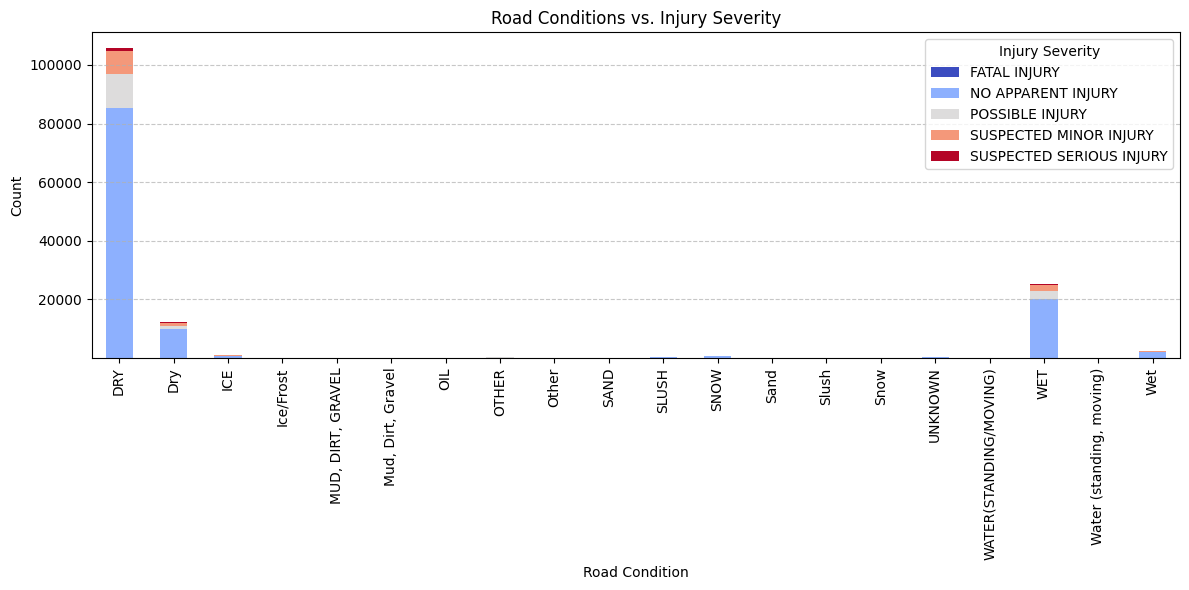

In [ ]:
# h. Analyze road surface conditions (Road Condition) vs. injury severity
if 'Surface Condition' in crash_data.columns:  # Assuming 'Surface Condition' refers to 'Road Condition'
    road_condition_severity = pd.crosstab(crash_data['Surface Condition'], crash_data['Injury Severity'])

    # Visualize road conditions vs. injury severity
    road_condition_severity.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
    plt.title('Road Conditions vs. Injury Severity')
    plt.xlabel('Road Condition')
    plt.ylabel('Count')
    plt.legend(title='Injury Severity')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


*Insight: Despite wet roads showing significant accident numbers, dry road conditions overwhelmingly account for the highest number of accidents across all injury severity levels, suggesting other factors like driver behavior may be more significant than road conditions in causing accidents.*

##**Key Findings**

1. **Injury Trends**: Most crashes result in "No Apparent Injury."  

2. **Severe Crashes**:  
   - More likely under adverse weather conditions (e.g., snow, ice, rain).  
   - Poor lighting correlates with higher probabilities of severe injuries.  
   - Distracted driving significantly increases the likelihood of severe injuries.  

3. **Temporal Patterns**:  
   - Crashes peak between 3-6 p.m., coinciding with afternoon rush hours.  
   - Fridays have the highest crash rates, likely due to increased end-of-week road activity.  

4. **Vehicle Involvement**: Passenger cars dominate crash statistics across all injury severity levels, far outnumbering other vehicle types.  

5. **Road and Weather Conditions**:  
   - Serious and fatal injuries are more common during adverse weather conditions combined with dark hours than in similar conditions during daylight.  
   - While wet roads account for a significant number of crashes, dry road conditions see the highest number of accidents overall, indicating that driver behavior may be a more critical factor.  





##**Discussion**

**Implications:**

The findings suggest that while environmental and vehicle-related factors play important roles in crash severity, human factors remain crucial. The high number of accidents during optimal conditions (dry roads, daylight) indicates that driver behavior and traffic management require particular attention in safety initiatives.

**Limitations:**



*   Potential reporting bias in crash data

*   Missing data in some categories
*   Limited ability to account for interaction effects between multiple factors


##**Recommendations**


**Policy Recommendations:**


1.  Enhanced traffic management during peak hours (3-6 PM)
2.  Targeted safety campaigns for high-risk conditions

3.   Infrastructure improvements focusing on lighting and road surface maintenance

4.   Special attention to passenger vehicle safety standards


**Future Research Directions:**


1.  Investigation of driver behavior patterns in optimal conditions
2.   Analysis of interaction effects between multiple risk factors

3.  Development of predictive models for crash severity





##**Conclusion**

This analysis reveals the complex interplay of factors influencing traffic crash severity. While environmental conditions play a significant role, the high frequency of accidents under optimal conditions suggests that human factors and traffic management should be primary focuses for safety improvements. The findings provide a statistical foundation for evidence-based policy making in traffic safety.